In [59]:
import os
import pandas as pd
from mprof import read_mprofile_file
import matplotlib.pyplot as plt

import numpy as np

In [60]:
CMD_BASE = "mprof run -o {o}.dat Rscript L0Learn_Profile.R --n {n} --p {p} --k {k} --s {s} --t {t} --w {w} --m {m} --f {f}"

In [110]:
file_name = 'test_run9'

run = {"n":4000, "p":100000, "k":10, "s":1, "t":2.1, "w":10, "m":1, "f":file_name, "o":file_name} 
cmd = CMD_BASE.format(**run)

In [111]:
cmd

'mprof run -o test_run9.dat Rscript L0Learn_Profile.R --n 4000 --p 100000 --k 10 --s 1 --t 2.1 --w 10 --m 1 --f test_run9'

In [112]:
os.system(cmd) # Creates <file_name>.dat and <file_name>.csv files in same directory as file.
# This cmd will often error out for no reason.
# https://github.com/pythonprofilers/memory_profiler/issues/240

256

In [113]:
memory_usage = read_mprofile_file(file_name + ".dat")
timing = pd.read_csv(file_name + ".csv")
timing = timing[['step', 'time']]

In [114]:
def timestamp_from_step(step):
    return timing[timing['step'] == step].iloc[0]['time']

def values_from_timestamp(memory_usage, start, back=0, forward=0):
    timestamps = np.array(memory_usage['timestamp'])
    mem_usages = np.array(memory_usage['mem_usage'])    
    memory_usage = {'timestamp': timestamps[(start - back <= timestamps)
                                            & (timestamps <= start + forward)],
                    'mem_usage': mem_usages[(start - back <= timestamps)
                                            & (timestamps <= start + forward)]}
    return memory_usage


    

In [115]:
def plot_L0Learn_Profile_Run(memory_usage, timing):
    f, ax = plt.subplots(1, 1, figsize=(12,5))

    f.suptitle('Memory Usage over Time')
    
    timestamps = np.array(memory_usage['timestamp'])
    memory_usage = np.array(memory_usage['mem_usage'])
    t_offset = min(timestamps)
    
    ax.plot(timestamps - t_offset,
            memory_usage)
    
    # Plot Dense Matrix Creation
    ax.axvspan(timestamp_from_step('GenSynthetic Start') - t_offset,
               timestamp_from_step('GenSynthetic End') - t_offset,
               facecolor='b',
               alpha=0.1)
    
    ax.text(timestamp_from_step('GenSynthetic Start') 
            - t_offset
            + (timestamp_from_step('GenSynthetic End')
               - timestamp_from_step('GenSynthetic Start'))/2,
            0,
            "Dense Matrix Creation")

    # Plot Sparse Creation
    ax.axvspan(timestamp_from_step('as dgCMatrix Start') - t_offset,
               timestamp_from_step('as dgCMatrix End') - t_offset,
               facecolor='b',
               alpha=0.1)

    ax.text(timestamp_from_step('as dgCMatrix Start') 
            - t_offset
            + (timestamp_from_step('as dgCMatrix End') 
               - timestamp_from_step('as dgCMatrix Start'))/2,
            0,
            "Sparse Matrix Creation")


    # Plot Dense L0Learn Operation
    ax.axvspan(timestamp_from_step('L0Learn Dense Start') - t_offset,
               timestamp_from_step('L0Learn Dense End') - t_offset,
               facecolor='r',
               alpha=0.1)
    
    ax.text(timestamp_from_step('L0Learn Dense Start')
            - t_offset
            + (timestamp_from_step('L0Learn Dense End') 
               - timestamp_from_step('L0Learn Dense Start'))/2,
            0,
            "L0Learn.fit [Dense]")

    # Plot Sparse L0Learn Operation
    ax.axvspan(timestamp_from_step('L0Learn Sparse Start') - t_offset,
               timestamp_from_step('L0Learn Sparse End') - t_offset,
               facecolor='r', alpha=0.1)
    
    ax.text(timestamp_from_step('L0Learn Sparse Start')
            - t_offset 
            + (timestamp_from_step('L0Learn Sparse End') 
               - timestamp_from_step('L0Learn Sparse Start'))/2,
            0,
            "L0Learn.fit [Sparse]")

    return f

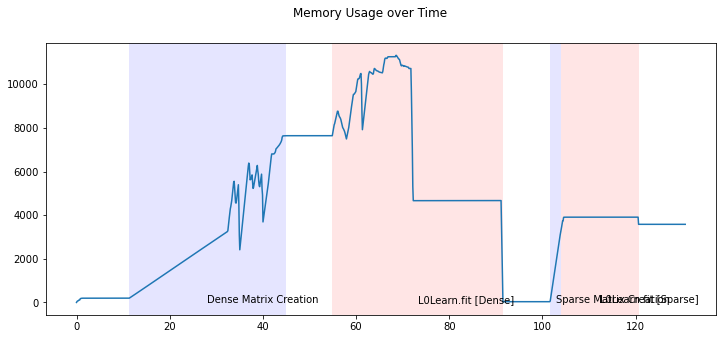

In [116]:
f = plot_L0Learn_Profile_Run(memory_usage, timing)
plt.show()

In [75]:
dense_start = timestamp_from_step('L0Learn Dense Start')
dense_end = timestamp_from_step('L0Learn Dense End')
sparse_start = timestamp_from_step('L0Learn Sparse Start')
sparse_end = timestamp_from_step('L0Learn Sparse End')

In [76]:
memory_pre_dense = values_from_timestamp(memory_usage,
                                         dense_start,
                                         back = 4)

memory_during_dense = values_from_timestamp(memory_usage,
                                            dense_start,
                                            forward = dense_end - dense_start)

memory_pre_sparse = values_from_timestamp(memory_usage,
                                          sparse_start,
                                          back = 4)

memory_during_sparse = values_from_timestamp(memory_usage,
                                             sparse_start,
                                             forward = sparse_end - sparse_start)


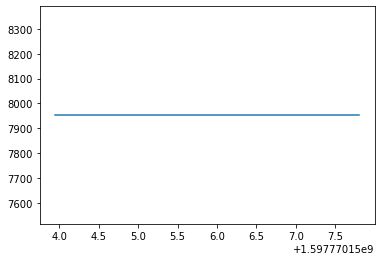

In [117]:
plt.plot(memory_pre_dense['timestamp'],
         memory_pre_dense['mem_usage'])

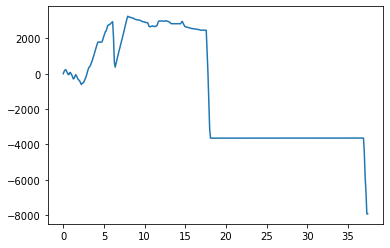

In [118]:
plt.plot(memory_during_dense['timestamp'] - np.min(memory_during_dense['timestamp']),
         memory_during_dense['mem_usage'] - np.median(memory_pre_dense['mem_usage']))

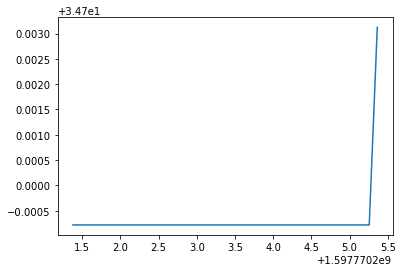

In [119]:
plt.plot(memory_pre_sparse['timestamp'],
         memory_pre_sparse['mem_usage'])

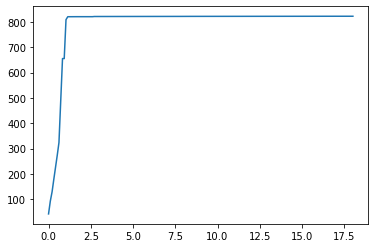

In [120]:
plt.plot(memory_during_sparse['timestamp'] - np.min(memory_during_sparse['timestamp']),
         memory_during_sparse['mem_usage'] - np.median(memory_pre_sparse['mem_usage']))